# Assignment_4: Random Forest Regressor

In [1]:
# Problem Statement

# The candidate with level 6.5 had a previous salary of 160000. In order to hire him in our new company, we would like to 
# confirm if he is being honest about his last salary and we will can predict this using the Random Forest.

# Agenda:

# To be able to predict the salaries of the organisation and be able to decide the limit to be given.

In [2]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
## Importing data-set

df = pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
## Calculating Correlation between variables

df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
## Here, correlation coefficient between Salary and Level is 0.8179. Strong Positive correlation is observed between variables.
## Correlation of the variable with itself is always 1.

<AxesSubplot:xlabel='Level', ylabel='Salary'>

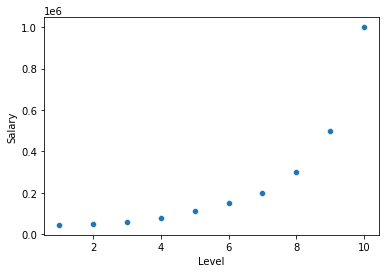

In [6]:
## Visualising relation between both variables

sns.scatterplot(data=df,x='Level',y='Salary')

In [7]:
## It can be observed that Salary increase with increase in Level. Polynomial relation between variables is observed.

In [8]:
## In the given dataset Position and Level imply the same thing, therefore we can consider any one of the both columns for prediction.
## x = Level (dependent)
## y = Salary (Independent)

In [9]:
x=df.iloc[:,1]
y=df['Salary']

In [10]:
## Splitting data in train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=4)
x_train=np.array(x_train).reshape(-1, 1)
y_train=np.array(y_train).reshape(-1, 1)
x_test=np.array(x_test).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1, 1)

In [11]:
## Fitting Random Forest Regressor model on train test

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=700,random_state=1)
rfr.fit(x_train,y_train.ravel())


RandomForestRegressor(n_estimators=700, random_state=1)

In [12]:
## Setting the value of n_estimators to 700 helps increasing the performance of the model. 
## Setting Random state facilitates reproducilbilty of the code.

In [13]:
## Evaluating Performance of the model

print("r2 for train:",rfr.score(x_train,y_train),"\n")
print("r2 for test:",rfr.score(x_test,y_test),"\n")
y_est_train = rfr.predict(x_train)
y_est_test = rfr.predict(x_test)
from sklearn.metrics import mean_squared_error
print("rmse for train:",np.sqrt(mean_squared_error(y_train, y_est_train)),"\n")
print("rmse for test:",np.sqrt(mean_squared_error(y_test, y_est_test)),"\n")

r2 for train: 0.9242995624470672 

r2 for test: 0.9914129600200736 

rmse for train: 86706.73352447296 

rmse for test: 17728.10376958873 



In [14]:
## The model can predict the values of Salary for any unseen value of Level with rmse of 17728.1037 units which means that the 
## predicted Salary may vary by 17728.10 units from actual Salary.
## R^2 of test data being 0.99141 imply that about 99.141% of variation in Salary is explained by 'Level'.

In [15]:
## Predicting the value of Salary for Level 6.5

x = 6.5
x = np.array(x).reshape(-1,1)
y_pred = rfr.predict(x)
y_pred

array([175042.85714286])

In [16]:
## Therefore, we get the predicted value of Salary to be 175042.85 for level = 6.5
## Also, our rmse, absolute error in prediction of test data is 17728.10. 
##
## Hence, the Salary of employer may be in following range,
##
##        160000 - 17728.104 = 142271.896 and 
##        160000 + 17728.104 = 177728.104
##
## The employer claimed his salary to be 160000 at level 6.5 may be considered to be true. As the Salary value is close to 
## the estimated value.